In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
class KMeans:
    """
    KMeans算法实现类

    参数:
        clusters_num(int): 聚类中心数
        times (int): 梯度下降迭代次数，默认1000
        init_method(str): 初始化方法（提供随机初始化和KMeans++）
        random_seed(int): 随机种子
    """
    def __init__(self, clusters_num, times=1000, init_method='random', random_seed=42):
        self.clusters_num = clusters_num
        self.times = times
        self.init_method = init_method
        self.centroids = None
        self.idx = None
        np.random.seed(random_seed)
    def init_random(self, X):
        """
        随机选点初始化聚类中心

        参数：
            X(np.array): 特征
        """
        n_data = X.shape[0]
        r_idx = np.random.randint(0, n_data, self.clusters_num)
        for i in range(self.clusters_num):
            self.centroids[i, :] = X[r_idx[i], :]

    def init_kmeans_pp(self, X):
        """
        KMeans++初始化聚类中心

        参数：
            X(np.array): 特征
        """
        n_samples = X.shape[0]
        # 随机分配第一个聚类中心
        first_center_idx = np.random.randint(n_samples)
        self.centroids[0] = X[first_center_idx]
        # 循环分配距离最远的聚类中心
        for i in range(1, self.clusters_num):
            distances = self.distance(X)[:, :i]
            min_distances = np.min(distances, axis=1)
            # 将距离设置成概率（越远概率越大）
            probs = min_distances / min_distances.sum()
            new_center_idx = np.random.choice(n_samples, p=probs)
            self.centroids[i] = X[new_center_idx]

    def distance(self, X):
        """
        计算特征和聚类中心距离

        参数：
            X(np.array): 特征

        返回：
            np.array: 距离
        """
        n_samples = X.shape[0]
        distances = np.zeros((n_samples, self.clusters_num))
        for i in range(self.clusters_num):
            distances[:, i] = np.sqrt(np.sum((X - self.centroids[i]) ** 2, axis=1))
        return distances

    def update_centroids(self, X, idx):
        """
        更新聚类中心

        参数：
            X(np.array): 特征
            idx(np.array): 特征分配到的聚类中心索引
        """
        for i in range(self.clusters_num):
            cluster_points = X[idx == i]
            if len(cluster_points) > 0:
                self.centroids[i] = np.mean(cluster_points, axis=0)


    def fit(self, X):
        """
        模型训练

        参数:
            X(np.array): 特征
        """
        n_samples, n_features = X.shape
        self.centroids = np.zeros((self.clusters_num, n_features))
        # 初始化
        if self.init_method == 'kmeans_pp':
            self.init_kmeans_pp(X)
        elif self.init_method == 'random':
            self.init_random(X)

        # 迭代更新聚类中心
        for i in range(self.times):
            distances = self.distance(X)
            new_idx = np.argmin(distances, axis=1)
            if self.idx is not None and np.all(new_idx == self.idx):
                # 若聚类索引不再更新，则结束迭代
                break
            self.idx = new_idx
            self.update_centroids(X, self.idx)

    def predict(self, X):
        """
        预测

        参数：
            X(np.array): 特征

        返回：
            聚类中心标签
        """
        distances = self.distance(X)
        return np.argmin(distances, axis=1)


In [3]:
# 中文和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [4]:
# 导入数据
data = loadmat('ex7data2.mat')
X = data['X']
X = np.array(X)
print(f"数据规模：{X.shape}")


数据规模：(300, 2)


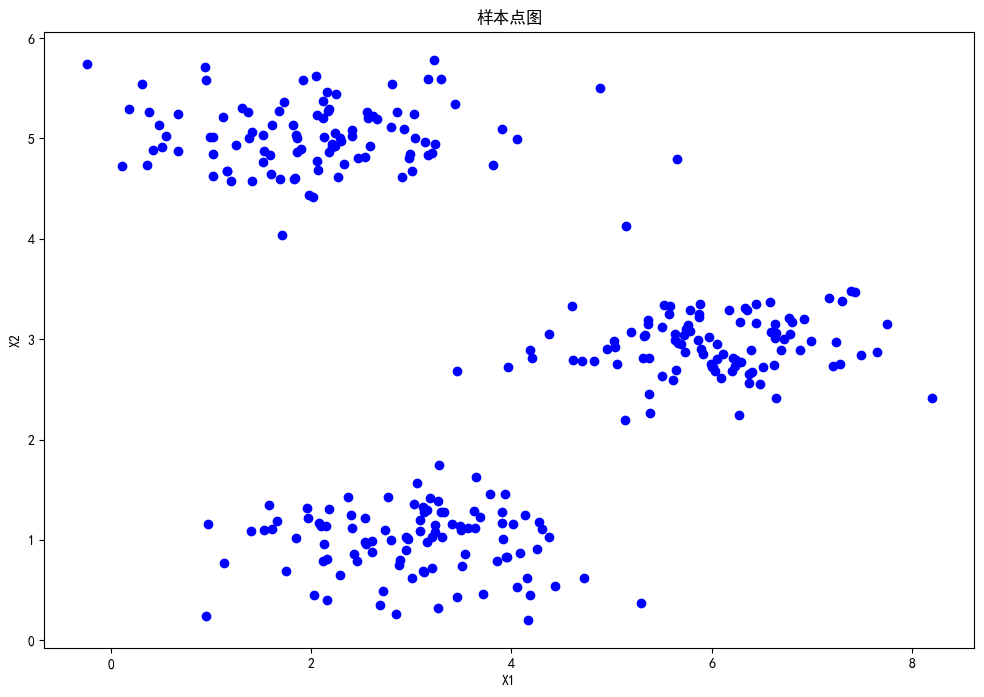

In [5]:
# 观察样本点
plt.figure(figsize=(12, 8))

plt.scatter(X[:, 0], X[:, 1], c='blue')
plt.title('样本点图')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
# 模型训练
model_random = KMeans(3)
model_random.fit(X)


In [7]:
# 获得预测标签
labels = model_random.predict(X)


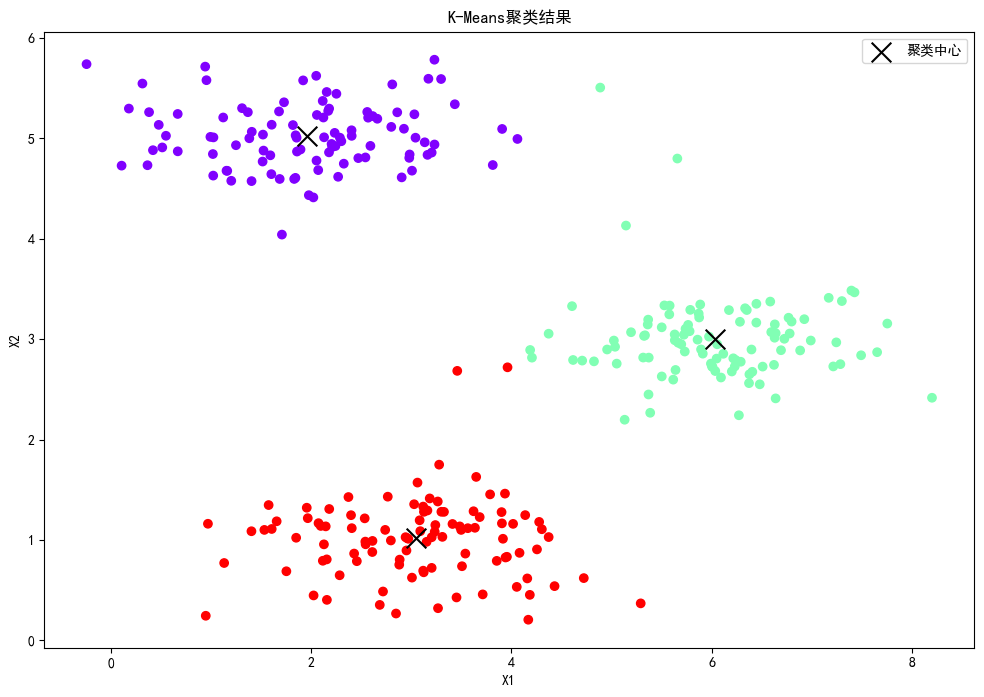

In [8]:
# 聚类结果可视化散点图
plt.figure(figsize=(12, 8))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(model_random.centroids[:, 0], model_random.centroids[:, 1], c='black',marker='x', s=200, label='聚类中心')
plt.title('K-Means聚类结果')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
